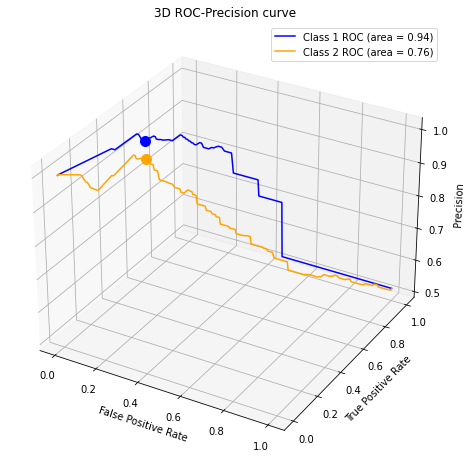

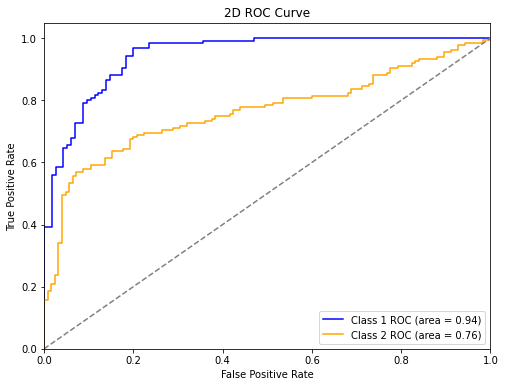

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from approx_thresh import ApproxThreshold

intersect = True
just_thresholds = False

if intersect:
    X1, y1 = make_classification(n_samples=500, n_features=15, n_classes=2, random_state=42, class_sep=1.0)
    X2, y2 = make_classification(n_samples=500, n_features=15, n_redundant=5, n_classes=2, random_state=42, class_sep=0.4)
else:
    X1, y1 = make_classification(n_samples=500, n_features=15, n_classes=2, random_state=42, class_sep=2.0)
    X2, y2 = make_classification(n_samples=500, n_features=15, n_redundant=5, n_classes=2, random_state=42, class_sep=0.5)

A1 = np.ones(y1.shape)
A2 = 2 * np.ones(y2.shape)

X = np.vstack([X1, X2])
y = np.hstack([y1, y2])
A = np.hstack([A1, A2])

X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, y, A, test_size=0.5, random_state=42)

clf = LogisticRegression()
model = ApproxThreshold(clf, lambda_=0.9)
model.fit(X_train, y_train, A_train)
predictions = model.predict(X_test, A_test)
model.plot_matplotlib()
model.plot_plotly()
model.plot_2d_roc()
model.plot_performance_comparison(X_test, y_test, A_test)



## General implementation

In [2]:
from approx_thresh_general import ApproxThresholdGeneral
from approx_thresh_general import tpr, fpr, precision

metrics_functions = {
    'tpr': tpr,
    'fpr': fpr,
    'precision': precision,
}

clf = LogisticRegression()
approx_threshold_classifier = ApproxThresholdGeneral(clf, metrics_functions, lambda_=0.9)
approx_threshold_classifier.fit(X_train, y_train, A_train)

print("Determined thresholds for each group:")
print(approx_threshold_classifier.thresholds_)


Best objective value: 0.3203397895845733
Determined thresholds for each group:
{1.0: 0.8594190850269041, 2.0: 0.6006097338520722}


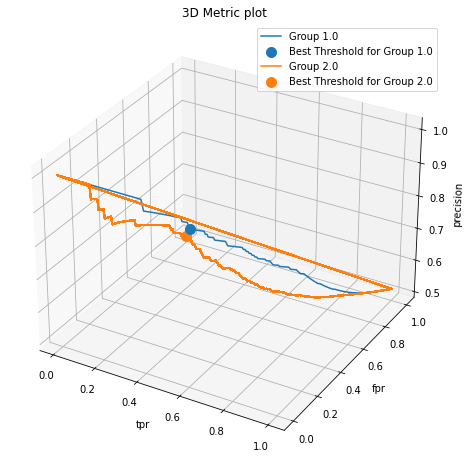

In [3]:
approx_threshold_classifier.plot_matplotlib()
approx_threshold_classifier.plot_plotly()
approx_threshold_classifier.plot_performance_comparison(X_test,y_test,A_test)
approx_threshold_classifier.plot_performance_comparison_groups(X_test,y_test,A_test)

## Using a smooth, differentiable objective function.

In [4]:
from approx_thresh_pytorch import ApproxThresholdPytorch, tpr_sigmoid, fpr_sigmoid, precision_sigmoid, accuracy_sigmoid
metrics_functions = {
    'tpr': tpr_sigmoid,
    'fpr': fpr_sigmoid,
    'precision': precision_sigmoid,
}

clf = LogisticRegression()
approx_threshold_classifier = ApproxThresholdPytorch(clf, metrics_functions, lambda_=0.9, global_metric_func=accuracy_sigmoid)
approx_threshold_classifier.fit(X_train, y_train, A_train)

print("Determined thresholds for each group:")
print(approx_threshold_classifier.thresholds_)

Initialization 0, Epoch 0, Loss: 2.047285556793213
Initialization 0, Epoch 10, Loss: 1.6744157075881958
Initialization 0, Epoch 20, Loss: 1.6326439380645752
Initialization 0, Epoch 30, Loss: 1.628411054611206
Initialization 0, Epoch 40, Loss: 1.6279878616333008
Early stopping triggered at initialization 0, epoch 49
Initialization 1, Epoch 0, Loss: 2.833054542541504
Initialization 1, Epoch 10, Loss: 2.440089702606201
Initialization 1, Epoch 20, Loss: 2.396151304244995
Initialization 1, Epoch 30, Loss: 2.3916995525360107
Initialization 1, Epoch 40, Loss: 2.3912553787231445
Early stopping triggered at initialization 1, epoch 49
Initialization 2, Epoch 0, Loss: 1.470075249671936
Initialization 2, Epoch 10, Loss: 0.9305909872055054
Initialization 2, Epoch 20, Loss: 0.8978427052497864
Initialization 2, Epoch 30, Loss: 0.8949885368347168
Initialization 2, Epoch 40, Loss: 0.894707977771759
Early stopping triggered at initialization 2, epoch 48
Initialization 3, Epoch 0, Loss: 1.630537509918213

In [5]:
approx_threshold_classifier.plot_performance_comparison(X_test, y_test, A_test)
approx_threshold_classifier.plot_performance_comparison_groups(X_test, y_test, A_test)

## Epsilon Net approx

In [6]:
from approx_thresh_general import ApproxThresholdNet

metrics_functions = {
    'tpr': tpr,
    'fpr': fpr,
    'precision': precision,
}

clf = LogisticRegression()
approx_threshold_classifier = ApproxThresholdNet(clf, metrics_functions, lambda_=0.9)
approx_threshold_classifier.fit(X_train, y_train, A_train)

print("Determined thresholds for each group:")
print(approx_threshold_classifier.thresholds_)


Number of points in the epsilon net: 299
Number of points in data: 500
Best objective value: 0.33311956280439353
Determined thresholds for each group:
{1.0: 0.848993288590604, 2.0: 0.6006711409395973}
